<section id="title-slide">
  <h1 class="title">The ABC of Computational Text Analysis</h1>
  <h2 class="subtitle">#08: Data Analysis of Swiss Media</h2>
  <p class="author">Alex Flückiger</p><p class="date">17 April 2025</p>
</section>

## Update the course material
1. Navigate to the course folder `KED2025` using `cd` in your command line
2. Update the files with `git pull`
3. If `git pull` doesn't work due to file conflicts, run `git restore .` first


## Getting started 
1. Open VS Code
2. Windows: Make sure that you are connected to WSL (green-badge in left-lower corner)
3. Open the `KED2025` folder via the menu: `File` > `Open Folder`
4. Navigate to `KED2025/ked/materials/code/KED2025_08.ipynb` and open with double-click
5. Run the code with `Run all` via the top menu

## Curate a dataset on `wokeness` in swiss media

The dataset is based on the following criteria:
- article contains the word `woke` (indicating topic: wokeness)
- published by NZZ or Tages-Anzeiger
- published between 2000-2025

Download and extract `.xz`-compressed dataset to get a `.tsv`. If you struggle with the extraction, you can go to the command-line and run:
```bash
xz -d filename.tsv.xz
```


![Query on Swissdox!](../../lectures/images/swissdox_woke.png)

## Modules
#### Standing on the shoulders of giants
- [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html): analyze tabular data 
- [plotnine](https://plotnine.readthedocs.io): visualize anything (*ggplot for Python*)
- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#): extract data from HTML and XML files

# Importing modules

various ways of importing

In [103]:
import pandas as pd
import plotnine as pn
from bs4 import BeautifulSoup

## Load dataset

In [104]:
# url to dataset stored in the GitHub project repository for easy online access
# path_to_dataset = "https://raw.githubusercontent.com/aflueckiger/KED2025/main/ked/materials/data/swiss_media_wokeness.tsv"

# when you have cloned the repository, you can also load the dataset from there
path_to_dataset = "../data/swiss_media_wokeness.tsv"

# load dataset
df = pd.read_csv(path_to_dataset, sep="\t")

# show the 3 first lines of the dataset
df.head(3)


,id,pubtime,medium_code,medium_name,rubric,regional,doctype,doctype_description,language,char_count,dateline,head,subhead,article_link,content_id,content
0,39835818,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,NaN,PND,National daily newspaper,de,3785,NaN,Mobbing im Zeichen des «Guten»,NaN,NaN,00961432-028a-ca23-6f60-f079f2d7c048,<tx><ld><p>Aus Angst vor Reputationsschäden re...
1,42536108,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,NaN,PND,National daily newspaper,de,12305,NaN,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,NaN,013e9093-5b0e-5356-d240-c9addcbfb8fc,"<tx><au>Claudia Mäder</au><p>Herr Bruckner, wa..."
2,31895707,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,NaN,PND,National daily newspaper,de,7883,NaN,Der Hass der Wohlgesinnten,NaN,NaN,03659813-b0f6-591a-855c-4f6964091cab,"<tx><ld><p>Rate mal, wer zum Essen kommt: Die ..."


## Get meta-information of a dataset

In [105]:
# show the dateset's shape (rows x columns)
df.shape


(433, 16)

In [106]:
# get general information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   433 non-null    int64  
 1   pubtime              433 non-null    object 
 2   medium_code          433 non-null    object 
 3   medium_name          433 non-null    object 
 4   rubric               430 non-null    object 
 5   regional             4 non-null      object 
 6   doctype              433 non-null    object 
 7   doctype_description  433 non-null    object 
 8   language             433 non-null    object 
 9   char_count           433 non-null    int64  
 10  dateline             43 non-null     object 
 11  head                 433 non-null    object 
 12  subhead              260 non-null    object 
 13  article_link         0 non-null      float64
 14  content_id           433 non-null    object 
 15  content              433 non-null    obj

## Remove irrelevant data

In [107]:
# define a list of irrelevant columns
columns_to_drop = [
    "id",
    "regional",
    "doctype",
    "doctype_description",
    "dateline",
    "content_id",
    "article_link"
]
# remove these columns and save resulting dataset into a new variable 
df_sub = df.drop(columns=columns_to_drop)

df_sub.head(3)


,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content
0,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,de,3785,Mobbing im Zeichen des «Guten»,NaN,<tx><ld><p>Aus Angst vor Reputationsschäden re...
1,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,de,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"<tx><au>Claudia Mäder</au><p>Herr Bruckner, wa..."
2,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,de,7883,Der Hass der Wohlgesinnten,NaN,"<tx><ld><p>Rate mal, wer zum Essen kommt: Die ..."


## Get statistics for numerical columns

In [108]:
# Get descriptive stats for each numerical column
df_sub.describe()


,char_count
count,433.000000
mean,7562.872979
std,3956.398566
min,343.000000
25%,4925.000000
50%,6946.000000
75%,9484.000000
max,36472.000000


## Count articles per...

In [109]:
# number of articles per newspaper
df_sub["medium_name"].value_counts()

medium_name
Neue Zürcher Zeitung    300
Tages-Anzeiger          133
Name: count, dtype: int64

In [110]:
# number of articles per rubric (limited to 10 most frequent)
df_sub["rubric"].value_counts()[:10]

rubric
Feuilleton                       116
International                     64
Meinung und Debatte               57
Kultur & Gesellschaft             31
Schweiz                           25
Wirtschaft                        15
Meinungen                         13
Kultur, Gesellschaft & Wissen     13
Medien                            13
Front                             12
Name: count, dtype: int64

## Visualize absolute frequency as bar plot

<Axes: title={'center': 'Number of articles per category'}, xlabel='rubric'>

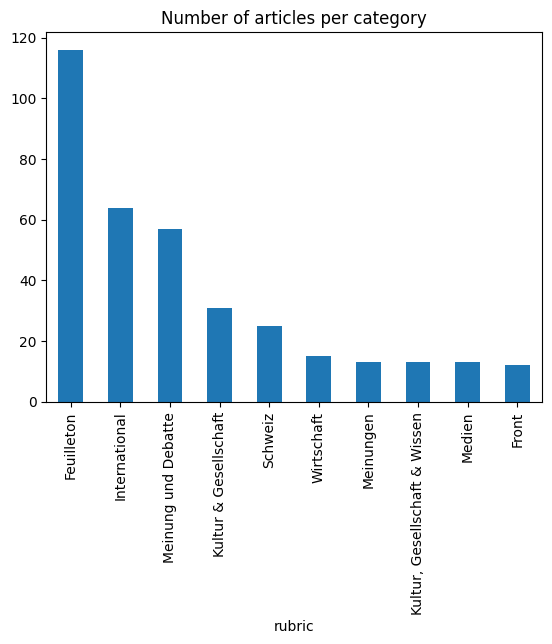

In [111]:
# visualize the number of articles per rubric as bar plot (same numbers as before)
# limit to the 10 most frequent rubrics
df_sub["rubric"].value_counts()[:10].plot(
    kind="bar", title="Number of articles per category"
)


## Visualize relative frequency as bar plot

<Axes: title={'center': 'Relative frequency of articles per category'}, xlabel='rubric'>

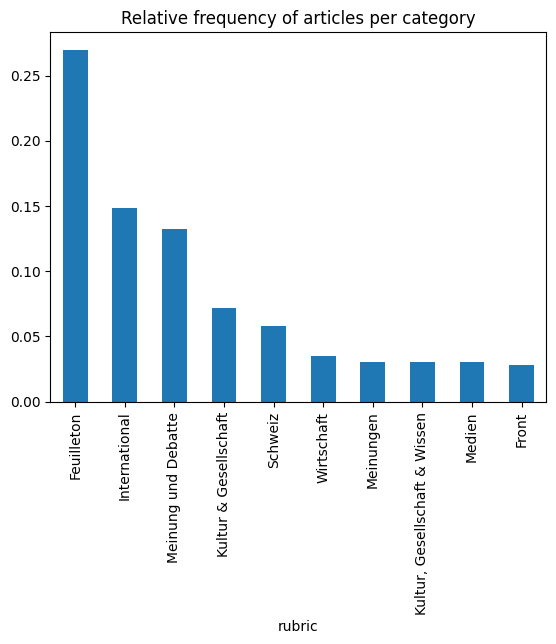

In [112]:
# visualize the relative frequency of articles per rubric (i.e., normalizing the absolute numbers)
df_sub["rubric"].value_counts(normalize=True)[:10].plot(
    kind="bar", title="Relative frequency of articles per category"
)


## Sanity check textual content

In [113]:
# unfortunately, the document content is not pure and contains HTML-tags
# we want to remove these elemnents (e.g. <tx><au><p>)
df_sub["content"][0]


'<tx><ld><p>Aus Angst vor Reputationsschäden reagieren Firmen oft kopflos, wenn sie einen Shitstorm befürchten. Doch das kann sich rächen.</p></ld><p><au>Michèle Binswanger</au></p><p>Die sozialen Medien waren dazu gedacht, die Meinungsäusserungsfreiheit zu fördern. Stattdessen bedrohen sie sie mittlerweile. Das zeigte sich vergangenes Wochenende. Kaum 24 Stunden nachdem sich ein Shitstorm gegen Influencerin Mimi Jäger erhoben hatte, zeigten sich einige ihrer Auftraggeber auf Twitter «bestürzt» (die Post), bekannten sich zu «Diversität und Vielfalt» (Philips) und gelobten, künftig nicht mehr mit Jäger zusammenzuarbeiten. Auffällig an diesen Bekenntnissen ist, wie reflexartig sie erfolgten und wie identisch sie in der Wortwahl sind. Ganz so, als zitiere man aus einem Handbuch. Und keiner machte sich die Mühe, zu überprüfen, was an den Anschuldigungen gegen Jäger eigentlich dran war. Nämlich herzlich wenig.</p><p>Wir leben in politisch aufgeladenen Zeiten, der Konformitätsdruck ist gross

In [114]:
# get a random sample of document content
df_sub["content"].sample(n=5)

325    <tx><au>Daniel Haas</au><p>Die Lust am Weltunt...
270    <tx><au>Josef Joffe</au><p>August Bebel, Mitbe...
412    <tx><au>Christian Wildhagen</au><p>Der junge M...
153    <tx><au>Benedict Neff</au><p>Als die russische...
72     <tx><p><au>Arnon Grünberg</au></p><p>«Ich vers...
Name: content, dtype: object

# Data is a dirty business
![Clean your data](../../lectures/images/clean_data.png)

## Clean a single document using BeautifulSoup


In [115]:
# assign the first document to a new variable
html_doc = df_sub["content"][0]

# create beautiful soup object for easy clean-up
soup = BeautifulSoup(html_doc)

# remove the authors name in the tag, e.g. <au>AUTHORNAME</au>
soup.au.decompose()

# strip the remaining tags and join the strings by newline
text = soup.get_text(separator="\n", strip=True)

# show the cleaned document
print(text)


Aus Angst vor Reputationsschäden reagieren Firmen oft kopflos, wenn sie einen Shitstorm befürchten. Doch das kann sich rächen.
Die sozialen Medien waren dazu gedacht, die Meinungsäusserungsfreiheit zu fördern. Stattdessen bedrohen sie sie mittlerweile. Das zeigte sich vergangenes Wochenende. Kaum 24 Stunden nachdem sich ein Shitstorm gegen Influencerin Mimi Jäger erhoben hatte, zeigten sich einige ihrer Auftraggeber auf Twitter «bestürzt» (die Post), bekannten sich zu «Diversität und Vielfalt» (Philips) und gelobten, künftig nicht mehr mit Jäger zusammenzuarbeiten. Auffällig an diesen Bekenntnissen ist, wie reflexartig sie erfolgten und wie identisch sie in der Wortwahl sind. Ganz so, als zitiere man aus einem Handbuch. Und keiner machte sich die Mühe, zu überprüfen, was an den Anschuldigungen gegen Jäger eigentlich dran war. Nämlich herzlich wenig.
Wir leben in politisch aufgeladenen Zeiten, der Konformitätsdruck ist gross. Wer ausschert, macht sich zum Ziel und riskiert eine Diffamie

## Clean all documents in the dataset

In [124]:
def remove_html_tags(text):
    # create beautiful soup object for easy clean-up
    soup = BeautifulSoup(text)

    try:
        # remove the authors name in the tag, e.g. <au>AUTHORNAME</au>
        soup.au.decompose()
    except AttributeError:
        # in some of the articles, there is no <au>AUTHORNAME</au>
        # thus, we want to catch the error and just by-pass the raised error
        pass

    # strip the remaining tags and join the strings by newline
    text = soup.get_text(separator="\n", strip=True)

    return text


# Call the function remove_html_tags for each cell in the column `content`
df_sub["content"] = df_sub["content"].map(remove_html_tags)

# Check the first document after cleaning
print(df_sub["content"][0])


Aus Angst vor Reputationsschäden reagieren Firmen oft kopflos, wenn sie einen Shitstorm befürchten. Doch das kann sich rächen.
Die sozialen Medien waren dazu gedacht, die Meinungsäusserungsfreiheit zu fördern. Stattdessen bedrohen sie sie mittlerweile. Das zeigte sich vergangenes Wochenende. Kaum 24 Stunden nachdem sich ein Shitstorm gegen Influencerin Mimi Jäger erhoben hatte, zeigten sich einige ihrer Auftraggeber auf Twitter «bestürzt» (die Post), bekannten sich zu «Diversität und Vielfalt» (Philips) und gelobten, künftig nicht mehr mit Jäger zusammenzuarbeiten. Auffällig an diesen Bekenntnissen ist, wie reflexartig sie erfolgten und wie identisch sie in der Wortwahl sind. Ganz so, als zitiere man aus einem Handbuch. Und keiner machte sich die Mühe, zu überprüfen, was an den Anschuldigungen gegen Jäger eigentlich dran war. Nämlich herzlich wenig.
Wir leben in politisch aufgeladenen Zeiten, der Konformitätsdruck ist gross. Wer ausschert, macht sich zum Ziel und riskiert eine Diffamie

## Exlclude missing data
There is some missing data indicated by NaN, which may bias your results. 
See also [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/).

In [125]:
# Check missing data in each column (na = not available)
df_sub.isna().sum()


pubtime          0
medium_code      0
medium_name      0
rubric           3
language         0
char_count       0
head             0
subhead        173
content          0
dtype: int64

In [138]:
# Filter articles where the rubric information is missing
df_filter = df_sub[df_sub["rubric"].isna() == False]
df_filter.shape


(430, 11)

## Recode categorial variables
Sometimes you want to change a category name to improve consistency or readability 

In [128]:
# Recode variable `language` (column name) from `de` to `German`
df_sub.replace(
    {
        "language": {"de": "German"},
    },
    inplace=True, # change directly in dataset
)
df_sub.head(3)

,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content
0,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,German,3785,Mobbing im Zeichen des «Guten»,NaN,Aus Angst vor Reputationsschäden reagieren Fir...
1,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,German,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"Herr Bruckner, was ging Ihnen durch den Kopf, ..."
2,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,German,7883,Der Hass der Wohlgesinnten,NaN,"Rate mal, wer zum Essen kommt: Die Horrorkomöd..."


## Search for relevant articles using regex

In [129]:
# select all rows for which the regular expression matches the article content
# the regex defines a pattern to match either `Theather` or `Aufführung`
df_theater = df_sub[df_sub["content"].str.contains("(?:Theater|Aufführung)")]
df_theater.head(3)

,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content
38,2024-07-06 00:00:00+02,NZZ,Neue Zürcher Zeitung,Wochenende,German,36472,Der Journalist für das Milliardenvolk,"Indiens Fernsehnachrichten sind laut, chaotisc...",Von\n(Text) und Rebecca Conway (Bilder)\nArnab...
62,2022-10-12 00:00:00+02,NZZ,Neue Zürcher Zeitung,Zürich und Region,German,5977,Kritik am Diversity-Kurs des Schauspielhauses,Der Stadtrat muss über die wirtschaftlichen Ko...,Dem Zürcher Schauspielhaus laufen die Zuschaue...
66,2022-12-27 00:00:00+01,NZZ,Neue Zürcher Zeitung,Meinung und Debatte,German,9484,Böse alte Welt,«Woke» Westler werfen früheren Gesellschaften ...,Der Abenteuerfilm «The Aeronauts» aus dem Jahr...


## Show single articles using index

In [139]:
# show text of the article with the index number 66
# the column with the text is called `content`
print(df_sub.iloc[66]["content"])


Der Abenteuerfilm «The Aeronauts» aus dem Jahr 2019 handelt von zwei Pionieren der Ballonfahrt. James Glaisher und Amelia Wren präsentieren einer staunenden und zahlenden Menschenmenge ihre Theorien über Atmosphäre und Wetterdaten, nebenbei brechen sie mit 23 000 Fuss Höhe einen Flugrekord. Das Experiment fand tatsächlich statt, 1862 über London. Eine blaue Plakette an seinem Wohnhaus erinnert an den Meteorologen und Astronomen Glaisher.
Die Sache ist allerdings die: Glaisher zur Seite und im Ballonkorb stand keine Frau, sondern der Aeronaut Henry Tracey Coxwell. Tom Harper, der Drehbuchautor und Regisseur, hatte ihn durch eine junge, verwitwete Pilotin ersetzt. Harper wollte damit ein Zeichen setzen: Es habe damals durchaus Naturwissenschafterinnen gegeben, nicht jedoch in der Royal Society, der ehrwürdigen Akademie der (Natur-)Wissenschaften des Vereinigten Königreichs. Noch immer liege der Frauenanteil dort bei gerade einmal acht Prozent. Er, Harper, wolle aber, dass sein Film ein z

## Analyze the article length

In [133]:
# Recompute article length rather than relying on the original `char_count`
df_sub["length"] = df_sub["content"].str.len()
df_sub.head(3)


,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content,length
0,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,German,3785,Mobbing im Zeichen des «Guten»,NaN,Aus Angst vor Reputationsschäden reagieren Fir...,3608
1,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,German,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"Herr Bruckner, was ging Ihnen durch den Kopf, ...",12056
2,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,German,7883,Der Hass der Wohlgesinnten,NaN,"Rate mal, wer zum Essen kommt: Die Horrorkomöd...",7417


<Axes: title={'center': 'Distribution of article length'}, ylabel='Frequency'>

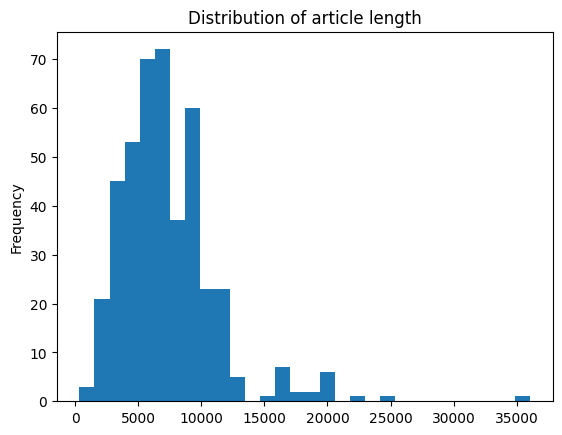

In [134]:
# visualize distribution of article length as histogram
df_sub["length"].plot(kind="hist", bins=30, title="Distribution of article length")


## Analyze the publishing cycle

- publishing frequency on wokeness over time
- broken down by newspaper

In [135]:
# Parse the `pubtime` as datetype (accounting for timezones)
df_sub["pubtime"] = pd.to_datetime(df_sub["pubtime"], utc=True)

# create new column with publication year only
df_sub["year"] = df_sub["pubtime"].dt.year
df_sub.head(3)


,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content,length,year
0,2020-06-17 22:00:00+00:00,TA,Tages-Anzeiger,Meinungen,German,3785,Mobbing im Zeichen des «Guten»,NaN,Aus Angst vor Reputationsschäden reagieren Fir...,3608,2020
1,2021-04-15 22:00:00+00:00,NZZ,Neue Zürcher Zeitung,Feuilleton,German,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"Herr Bruckner, was ging Ihnen durch den Kopf, ...",12056,2021
2,2017-05-05 22:00:00+00:00,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,German,7883,Der Hass der Wohlgesinnten,NaN,"Rate mal, wer zum Essen kommt: Die Horrorkomöd...",7417,2017


In [136]:
# Group data by year and newspaper and count the respective articles
docs_per_year = (
    df_sub.groupby(["year", "medium_name"])
    .agg({"content": "count"})
    .reset_index()
    .rename(columns={"content": "count"})
)
docs_per_year


,year,medium_name,count
0,2000,Tages-Anzeiger,1
1,2001,Neue Zürcher Zeitung,1
2,2001,Tages-Anzeiger,2
3,2004,Neue Zürcher Zeitung,1
4,2004,Tages-Anzeiger,1
5,2007,Tages-Anzeiger,1
6,2013,Tages-Anzeiger,1
7,2017,Tages-Anzeiger,2
8,2018,Neue Zürcher Zeitung,1
9,2019,Neue Zürcher Zeitung,3


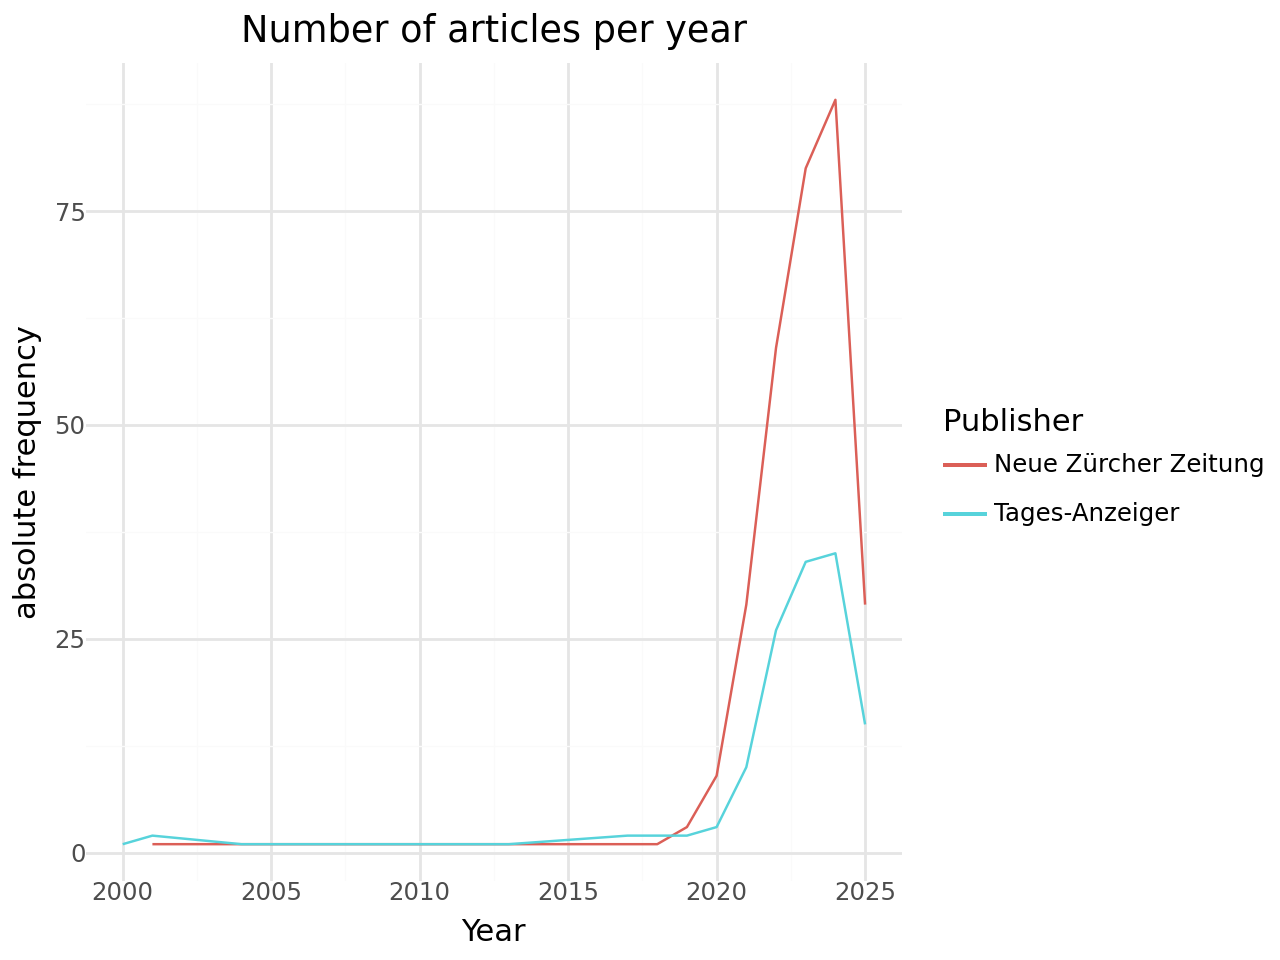

In [137]:
# visualize the number of articles per year and newspaper
# for more complex figures, we use plotnine instead of standard visualization of pandas
(
    pn.ggplot(docs_per_year, pn.aes(x="year", y="count", color="medium_name"))
    + pn.geom_line()
    + pn.labs(title="Number of articles per year", x="Year", y="absolute frequency",  color="Publisher")
    + pn.theme_minimal()
)


## Key aspects of publishing on wokeness
- wokeness is a recent topic in Swiss Media
  - starts in 2013
  - skyrockets after 2020 
- NZZ becomes obsessed with the topic in 2022
  - "woke plays" at Schauspielhaus Zürich
  - US politics

## Export the modified dataset as CSV

In [ ]:
# Save dataset as CSV file without an index
df_sub.to_csv("extended_swiss_media_wokeness.tsv", index=False)


# In-class: Exercises I

1. Execute the code in this Jupyter Notebook by clicking "Run All". Check the code and the outputs below each cell.
2. Combine a few words of your interest into a singular regular expression and search for all occurrences.
3. Use the `id` of the row to look at the articles content.
4. Rename the column from `medium_name` to `publisher`.


# In-class: Exercises II
1. Visualize the article's rubric over time instead of the newspaper
2. Some articles have still some meta information in their text. Remove the last line of articles if it doesn't end like a regular sentence  (e.g. `Gaëtan Bally / Keystone`). Use regular expressions.


# In-class: Exercises III
1. Choose a topic of your interest and curate your own dataset on Swissdox by using relevant keywords
2. How do different keywords infuence your results? Try to make your results more robust by combining keywords with bool operators (`AND`, `OR`, `NOT`). See also the [manual](https://liri.linguistik.uzh.ch/wiki/langtech/swissdox/query).

# Resources
Learn more about data analysis using Pandas
- [Explaratory data analysis on UN General Debate](https://www.oreilly.com/library/view/blueprints-for-text/9781492074076/ch01.html)
- [Introduction to Pandas for Social Scientists](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/00-Data-Analysis.html)

# Solutions

In [ ]:
# task II.1
# visualize the number of articles per year and rubric
docs_per_year = (
    df_sub.groupby(["year", "rubric"])
    .agg({"content": "count"})
    .reset_index()
    .rename(columns={"content": "count"})
)

(
    pn.ggplot(docs_per_year, pn.aes(x="year", y="count", color="rubric"))
    + pn.geom_line()
    + pn.labs(title="Number of articles per year", x="Year", y="absolute frequency")
    + pn.theme_minimal()
    + pn.theme(figure_size=(10,5)) # increase figure size because of the big legend
)
